In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [8]:
gold = pd.read_csv('G:/My Drive/Resume & Documents/Data analyst Trianee Intrenshi[p/GOLDUP.csv')
gold.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [9]:
gold.describe().T

,count,mean,std,min,25%,50%,75%,max
Gold_Price,239.0,19299.062762,11668.913490,4267.000000,6712.500000,19056.000000,29364.00000,52917.000000
Crude_Oil,239.0,3397.686318,1551.627401,887.420000,2180.695000,3303.550000,4492.93000,6926.830000
Interest_Rate,239.0,6.715900,1.188309,4.250000,6.000000,6.000000,7.00000,10.250000
USD_INR,239.0,53.804819,10.311144,39.366685,45.467395,48.664774,63.86103,76.222334
Sensex,239.0,18172.443891,11032.206600,2811.600000,8263.400000,17464.810000,26662.39500,41253.740000
CPI,239.0,73.372050,29.106141,36.730000,45.190000,68.470000,101.37000,129.300000
USD_Index,239.0,90.182510,11.312607,71.800000,81.110000,88.940000,97.16000,120.240000


In [10]:

gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


In [33]:
gold['Date'] = pd.to_datetime(gold['Date'])  # Replace 'date' with your actual date column name

# Select only numeric columns for correlation
numeric_cols = gold.select_dtypes(include=['float64', 'int64']).columns
gold_numeric = gold[numeric_cols]


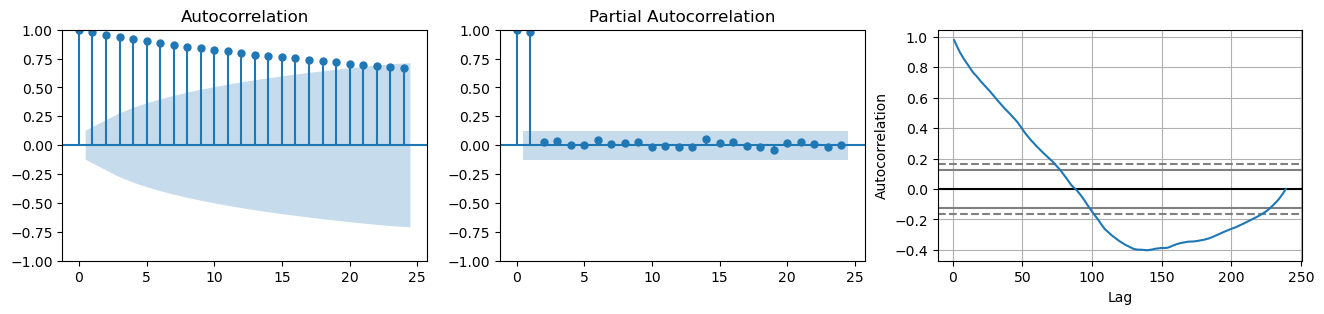

In [34]:
# plotting correlation of Gold_Price
fig, ax = plt.subplots(1,3,figsize=(16,3))
plot_acf(gold.Gold_Price, ax=ax[0]);
plot_pacf(gold.Gold_Price, ax=ax[1]);
pd.plotting.autocorrelation_plot(gold.Gold_Price, ax=ax[2])
plt.show()

In [35]:
# create a dated indexed gold dataset
gold_ts = gold.copy()
gold_ts.Date = pd.to_datetime(gold_ts.Date, format='%d-%m-%Y')
gold_ts.set_index('Date', inplace=True)

In [36]:
gold_ts.head()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
Date,,,,,,,
2000-01-10,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
2000-01-11,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2000-01-12,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
2001-01-01,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
2001-01-02,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


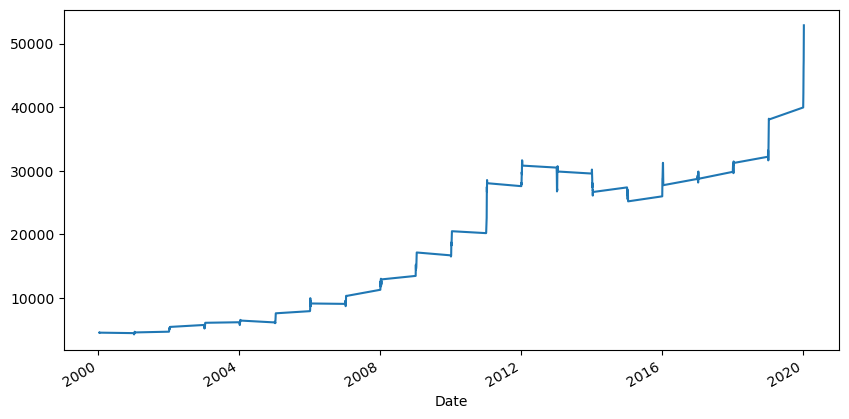

In [37]:
plt.subplots(figsize=(10,5))
gold_ts.Gold_Price.plot()
plt.show()

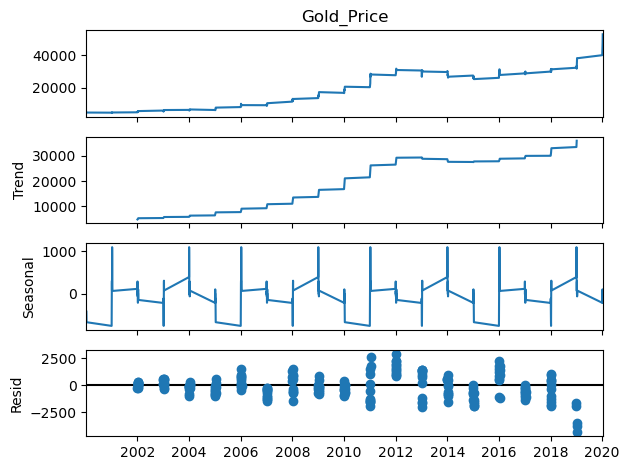

In [38]:
result = seasonal_decompose(gold_ts.Gold_Price,model='additive',period = 30)
result.plot();

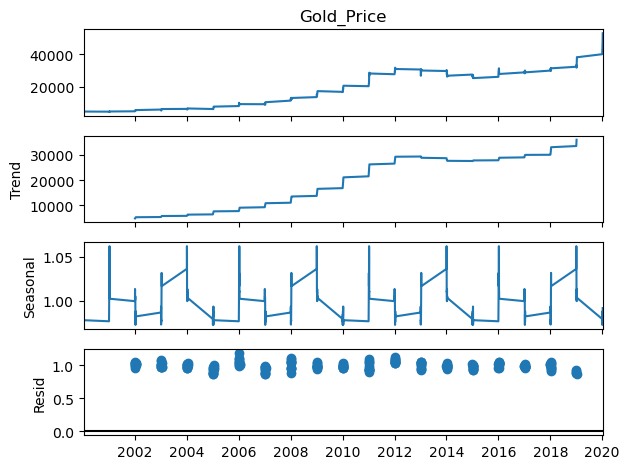

In [39]:
result2 = seasonal_decompose(gold_ts.Gold_Price,model='multiplicative',period = 30)
result2.plot();

<Axes: xlabel='Date'>

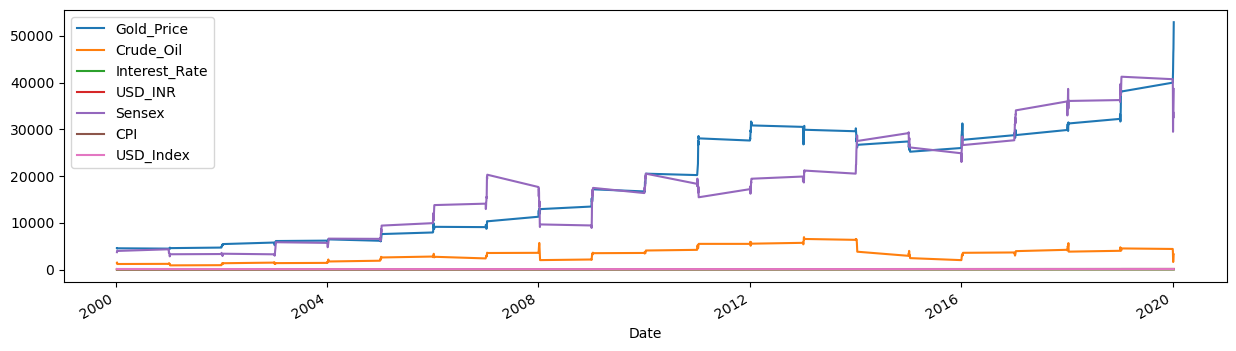

In [40]:
# correlation with other variables:
gold_ts.plot(figsize=(15,4))

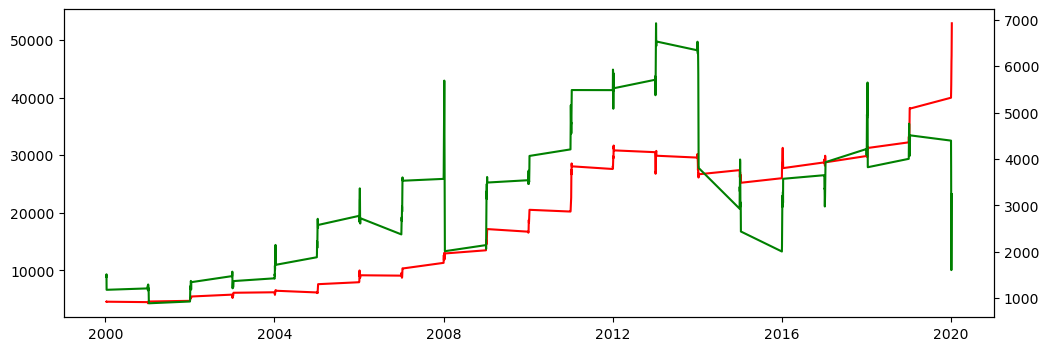

In [41]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(gold_ts.Gold_Price, label='Gold Price', color='red')

ax2 = ax.twinx()
ax2.plot(gold_ts.Crude_Oil, label='Crude Oil', color='green')
plt.show()

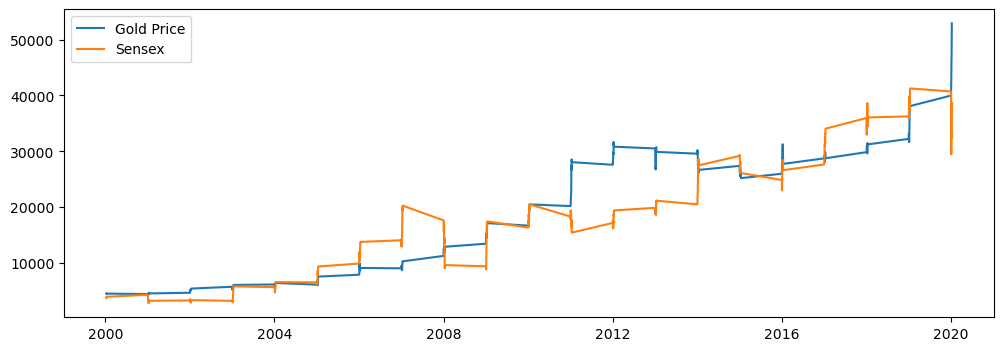

In [42]:
plt.subplots(figsize=(12,4))
plt.plot(gold_ts.Gold_Price, label='Gold Price')
plt.plot(gold_ts.Sensex, label='Sensex')
plt.legend()
plt.show()

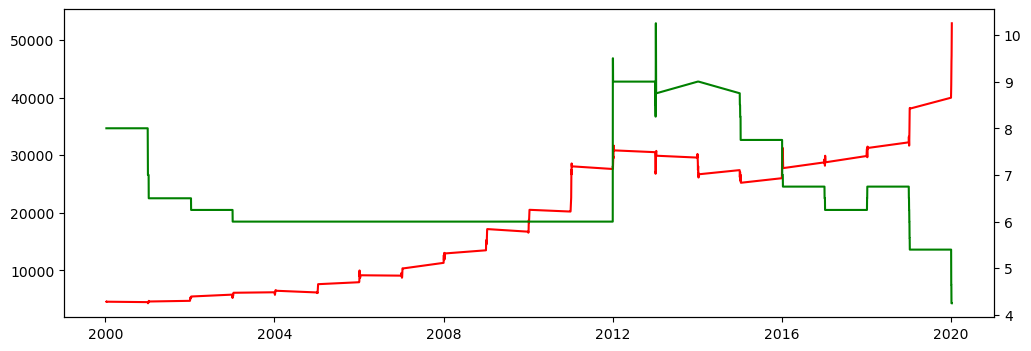

In [43]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(gold_ts.Gold_Price, label='Gold Price', color='red')

ax2 = ax.twinx()
ax2.plot(gold_ts.Interest_Rate, label='Interest_Rate', color='green')
plt.show()

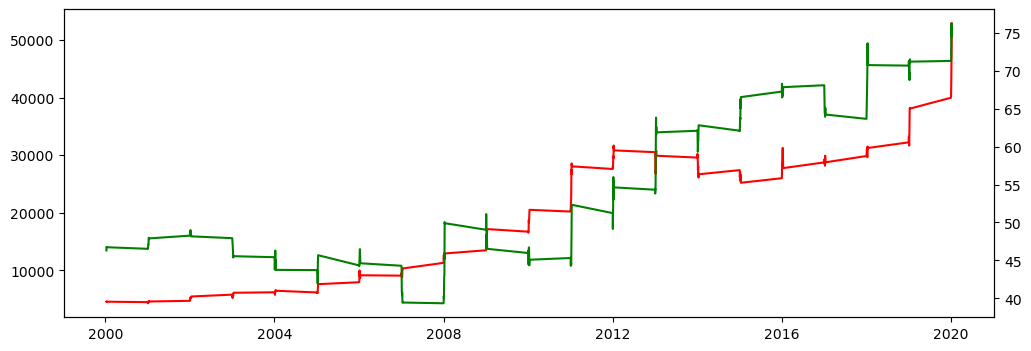

In [44]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(gold_ts.Gold_Price, label='Gold Price', color='red')

ax2 = ax.twinx()
ax2.plot(gold_ts.USD_INR, label='USD_INR', color='green')
plt.show()

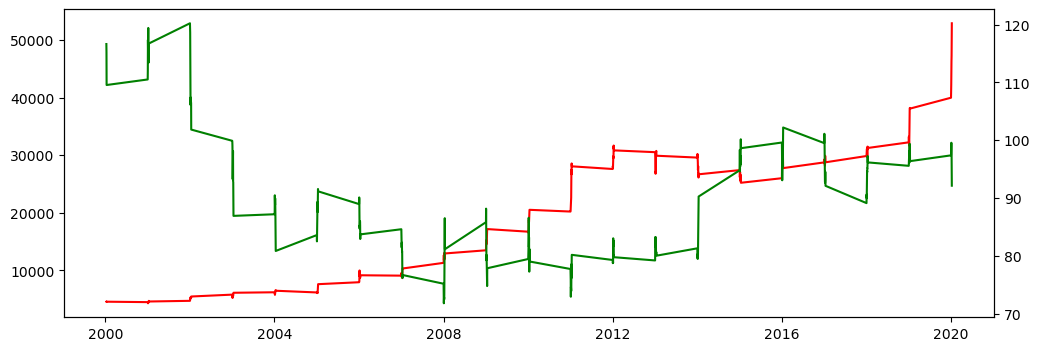

In [45]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(gold_ts.Gold_Price, label='Gold Price', color='red')

ax2 = ax.twinx()
ax2.plot(gold_ts.USD_Index, label='USD_Index', color='green')
plt.show()

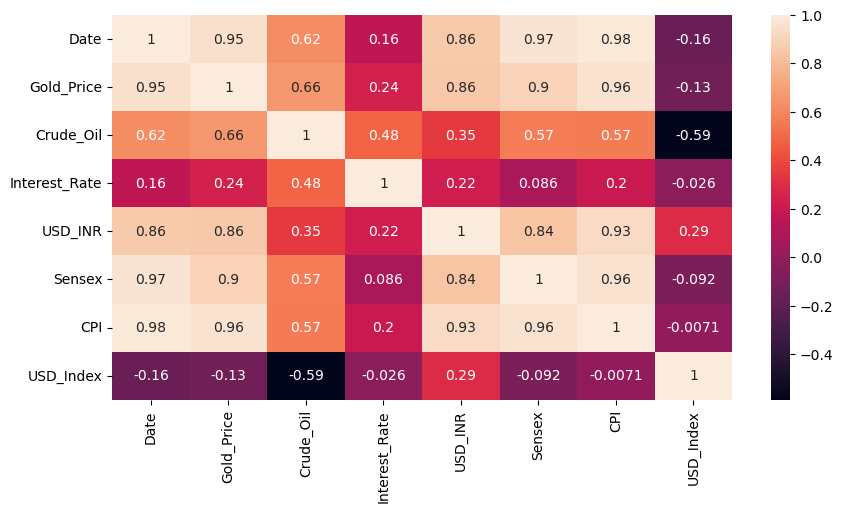

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(gold.corr(),annot=True)
plt.show()

In [48]:
# Seperating X (independent) and y (dependent) variables:
X = gold.drop(['Gold_Price','Date'],axis=1)
y = gold.Gold_Price

In [49]:
# Regression model
goldlr = LinearRegression()
goldlr = goldlr.fit(X,y)

print('y Intercept: ',goldlr.intercept_)
print('Cofficients: ',goldlr.coef_)

y Intercept:  -2544.5153361400153
Cofficients:  [ 1.27661583e+00 -7.23404537e+02 -2.89155123e+02 -6.85908153e-01
  6.96709372e+02 -8.11774161e+00]


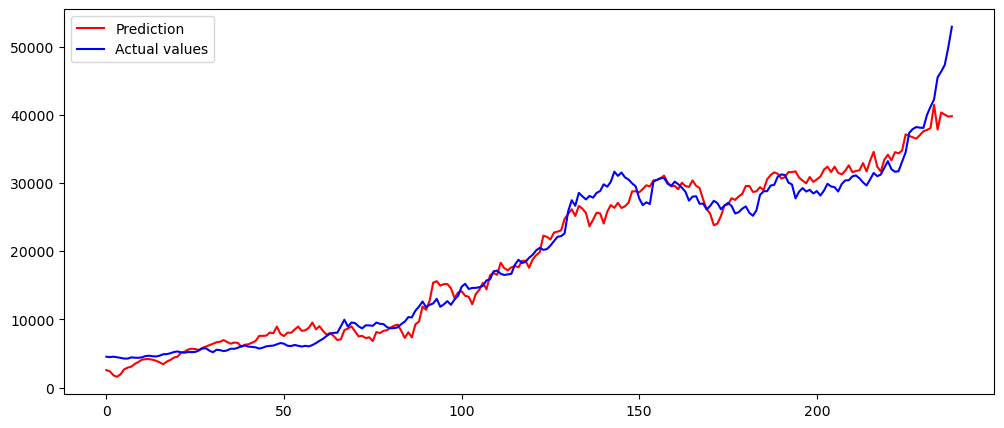

In [50]:
y_pred = goldlr.predict(X)

plt.figure(figsize=(12,5))
plt.plot(y_pred, label = 'Prediction', color='r')
plt.plot(y, label = 'Actual values',color='b')
plt.legend()
plt.show()

In [51]:
def forecast_accuracy(actual,forecast):
    mape = mean_absolute_percentage_error(actual,forecast)
    mse = mean_squared_error(actual,forecast)
    mae = mean_absolute_error(actual,forecast)
    
    return({'MAE: ':mae, 'MAPE: ':mape, 'MSE: ':mse})

In [52]:
forecast_accuracy(y,y_pred)

{'MAE: ': 1677.123305533609,
 'MAPE: ': 0.12036203213833248,
 'MSE: ': 5208187.864580984}

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
ols_model = smf.ols(formula = 'Gold_Price~Crude_Oil+Interest_Rate+USD_INR+Sensex+CPI+USD_Index',data=gold).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     968.0
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          3.99e-161
Time:                        01:51:06   Log-Likelihood:                -2187.3
No. Observations:                 239   AIC:                             4389.
Df Residuals:                     232   BIC:                             4413.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2544.5153   1966.871     -1.294      0.197   -6419.727    1330.696
Crude_Oil         1.2766      0.219      5.831      0.000       0.845       1.708
Interest_Rate  -723.4045    183.305     -3.946      0.000   -1084.559    -362.250
USD_INR        -289.1551     75.904     -3.809      0.000    -438.704    -139.606
Sensex           -0.6859      0.063    -10.856      0.000      -0.810      -0.561
CPI             696.7094     41.806     16.665      0.000     614.341     779.078
USD_Index        -8.1177     26.742     -0.304      0.762     -60.806      44.571
==============================================================================
Omnibus:                       97.388   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.720
Skew:                           1.623   Prob(JB):                     1.19e-91
Kurtosis:                       8.614   Cond. No.                     2.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
calc_vif(X)

,variables,VIF
0,Crude_Oil,19.227092
1,Interest_Rate,69.523080
2,USD_INR,716.378430
3,Sensex,77.910561
4,CPI,435.058509
5,USD_Index,190.944989


In [56]:
# after dropping USD_Index from the independent variable
ols_model2 = smf.ols(formula='Gold_Price~Crude_Oil+Interest_Rate+USD_INR+Sensex+CPI',data=gold).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1166.
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          1.16e-162
Time:                        01:51:38   Log-Likelihood:                -2187.3
No. Observations:                 239   AIC:                             4387.
Df Residuals:                     233   BIC:                             4408.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2857.2544   1672.190     -1.709      0.089   -6151.800     437.291
Crude_Oil         1.3111      0.187      7.020      0.000       0.943       1.679
Interest_Rate  -737.8655    176.661     -4.177      0.000   -1085.923    -389.808
USD_INR        -302.7625     61.134     -4.952      0.000    -423.208    -182.317
Sensex           -0.6894      0.062    -11.124      0.000      -0.812      -0.567
CPI             701.5756     38.535     18.206      0.000     625.653     777.498
==============================================================================
Omnibus:                       98.541   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.533
Skew:                           1.637   Prob(JB):                     1.97e-94
Kurtosis:                       8.711   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
calc_vif(gold[['Crude_Oil','Interest_Rate','USD_INR','Sensex','CPI']])

,variables,VIF
0,Crude_Oil,17.465691
1,Interest_Rate,63.947989
2,USD_INR,152.383338
3,Sensex,69.574837
4,CPI,232.035840


In [58]:
X_new = gold[['Crude_Oil','Interest_Rate','USD_INR','Sensex','CPI']]
y = gold.Gold_Price

In [59]:
newlr = LinearRegression()
newlr = newlr.fit(X_new, y)

print('y Intercept: ',newlr.intercept_)
print('Cofficients: ',newlr.coef_)

y Intercept:  -2857.254370229155
Cofficients:  [ 1.31109760e+00 -7.37865488e+02 -3.02762507e+02 -6.89445264e-01
  7.01575552e+02]


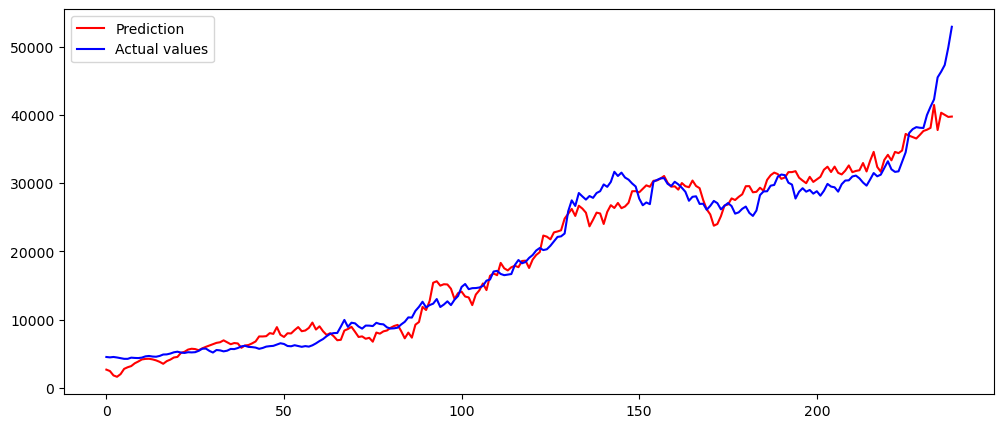

In [60]:
y_pred = newlr.predict(X_new)

plt.figure(figsize=(12,5))
plt.plot(y_pred, label = 'Prediction', color='r')
plt.plot(y, label = 'Actual values',color='b')
plt.legend()
plt.show()

In [61]:
mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
mape = mean_absolute_percentage_error(y,y_pred)

print('MSE: ',mse)
print('MAE: ',mae)
print('MAPE: ',mape)

MSE:  5210256.45517136
MAE:  1669.4536130215133
MAPE:  0.11836295417974016


In [64]:
!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(gold_ts.Gold_Price, start_p=1,start_q=1,
                      test='adf',
                      max_p=3,max_q=3,m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model.summary())

  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cython-3.1.3-cp313-cp313-win_amd64.whl.metadata (4.9 kB)
Using cached cython-3.1.3-cp313-cp313-win_amd64.whl (2.7 MB)
Failed to build pmdarima


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [43 lines of output]
  Partial import of pmdarima during the build process.
  
  Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
  Adding extra setuptools args
  Setting up with setuptools
  Traceback (most recent call last):
    File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
      ~~~~^^
    File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.p

ModuleNotFoundError: No module named 'pmdarima'

In [65]:
train = gold_ts.Gold_Price[:200]
test = gold_ts.Gold_Price[200:]

In [66]:
ar_model = ARIMA(train,order=(1,2,2))
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Gold_Price   No. Observations:                  200
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1567.823
Date:                Fri, 05 Sep 2025   AIC                           3143.646
Time:                        01:55:30   BIC                           3156.799
Sample:                             0   HQIC                          3148.970
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7585      0.162     -4.692      0.000      -1.075      -0.442
ma.L1         -0.1499      0.183     -0.820      0.412      -0.508       0.209
ma.L2         -0.8484      0.186     -4.558      0.0

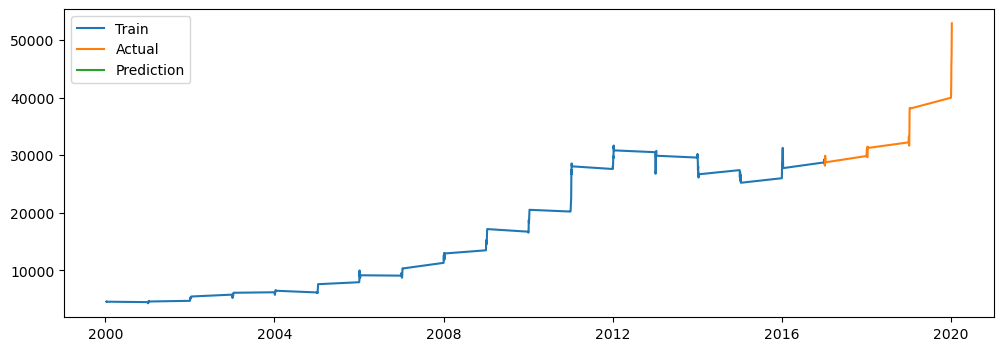

In [67]:
ar_pred = ar_model_fit.forecast(39)
ar_pred_series = pd.Series(ar_pred,index=test.index)

plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test, label='Actual')
plt.plot(ar_pred_series,label='Prediction')
plt.legend()
plt.show()

In [68]:
forecast_accuracy(test,ar_pred_series)

ValueError: Input contains NaN.

In [69]:
period = 10
fc = model.predict(n_periods=period)
#index_fc = np.arange(len(gold.Gold_Price),len(gold.Gold_Price)+period)
#fc_series = pd.Series(fc,index=index_fc)

plt.figure(figsize=(12,4))
plt.plot(gold_ts.Gold_Price,label='Actual')
plt.plot(fc,label='Prediction')
plt.legend()
plt.show()

NameError: name 'model' is not defined